In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
customer_data = pd.DataFrame({
    'customer_id': np.arange(1, 101),  # 100 customers
    'products_purchased': np.random.randint(1, 20, 100),
    'complaints': np.random.randint(0, 5, 100),
    'money_spent': np.random.uniform(100, 10000, 100)
})
customer_data.to_csv('customer_data.csv', index=False)

print(customer_data.head())

   customer_id  products_purchased  complaints  money_spent
0            1                   7           2  5949.840138
1            2                  15           2  6807.887182
2            3                  11           0   264.219506
3            4                   8           2  5169.721277
4            5                   7           4  2342.308174


In [3]:
customer_data.describe()

,customer_id,products_purchased,complaints,money_spent
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,9.640000,1.910000,5360.078145
std,29.011492,5.296311,1.429099,2915.869223
min,1.000000,1.000000,0.000000,150.109680
25%,25.750000,5.000000,0.750000,2707.533109
50%,50.500000,9.000000,2.000000,5777.477021
75%,75.250000,14.000000,3.000000,7572.890659
max,100.000000,19.000000,4.000000,9901.533116


In [4]:
customer_data.isnull().sum()

customer_id           0
products_purchased    0
complaints            0
money_spent           0
dtype: int64

In [5]:
X = customer_data.drop(columns=['customer_id'])

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [8]:
customer_data['Cluster'] = kmeans.labels_

In [9]:
print(customer_data.head())

   customer_id  products_purchased  complaints  money_spent  Cluster
0            1                   7           2  5949.840138        2
1            2                  15           2  6807.887182        3
2            3                  11           0   264.219506        4
3            4                   8           2  5169.721277        2
4            5                   7           4  2342.308174        0


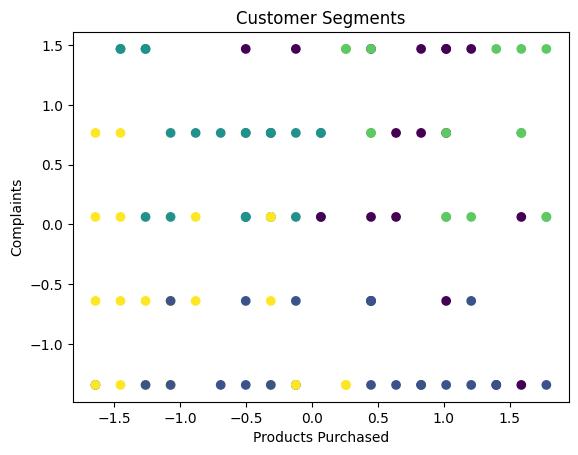

In [10]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Products Purchased')
plt.ylabel('Complaints')
plt.title('Customer Segments')
plt.show()